In [1]:
import numpy as np

import wf_psf

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import seaborn as sns


In [2]:
def define_plot_style():
    # Define plot paramters
    # Use seaborn style
    sns.set()
    
    plot_style = {
        'figure.figsize': (12,8),
        'figure.dpi': 200,
        'figure.autolayout':True,
        'lines.linewidth': 2,
        'lines.linestyle': '-',
        'lines.marker': 'o',
        'lines.markersize': 10,
        'legend.fontsize': 20,
        'legend.loc': 'best',
        'axes.titlesize': 24,
        'font.size': 22
    }
    mpl.rcParams.update(plot_style)

In [8]:
metrics_file = '../wf-outputs-{}/metrics/metrics-poly_interp_{}bins_sigma_{}.npy'

saving_folder ='../figures/'

In [30]:
n_realizations = 5
n_bins_list = ['8', '16_', '32_']
sigma_vals = [0, 0.005, 0.01, 0.02]
sigma_list = ['0', '005', '01', '02']

# Super resolved PSF pixel relative errors

In [35]:
metrics_dict_list = np.array([[wf_psf.script_utils.extract_shape_pix_results([np.load(metrics_file.format(realisation+1,n_bins_list[n_bins], sigma), allow_pickle=True)[()] for sigma in sigma_list]) for n_bins in range(len(n_bins_list))] for realisation in range(n_realizations)])
print(metrics_dict_list.shape, '<---- (realisations, n_bins, metric_vals, sigmas)')
# 2 ---> relative RMSE (check output of: wf_psf.script_utils.extract_shape_pix_results())
pix_rel_rmse = np.mean(metrics_dict_list[:,:,2,:], axis=(0))
print(pix_rel_rmse.shape, '<---- (n_bins, sigmas)')

(5, 3, 4, 4) <---- (realisations, n_bins, metric_vals, sigmas)
(3, 4) <---- (n_bins, sigmas)


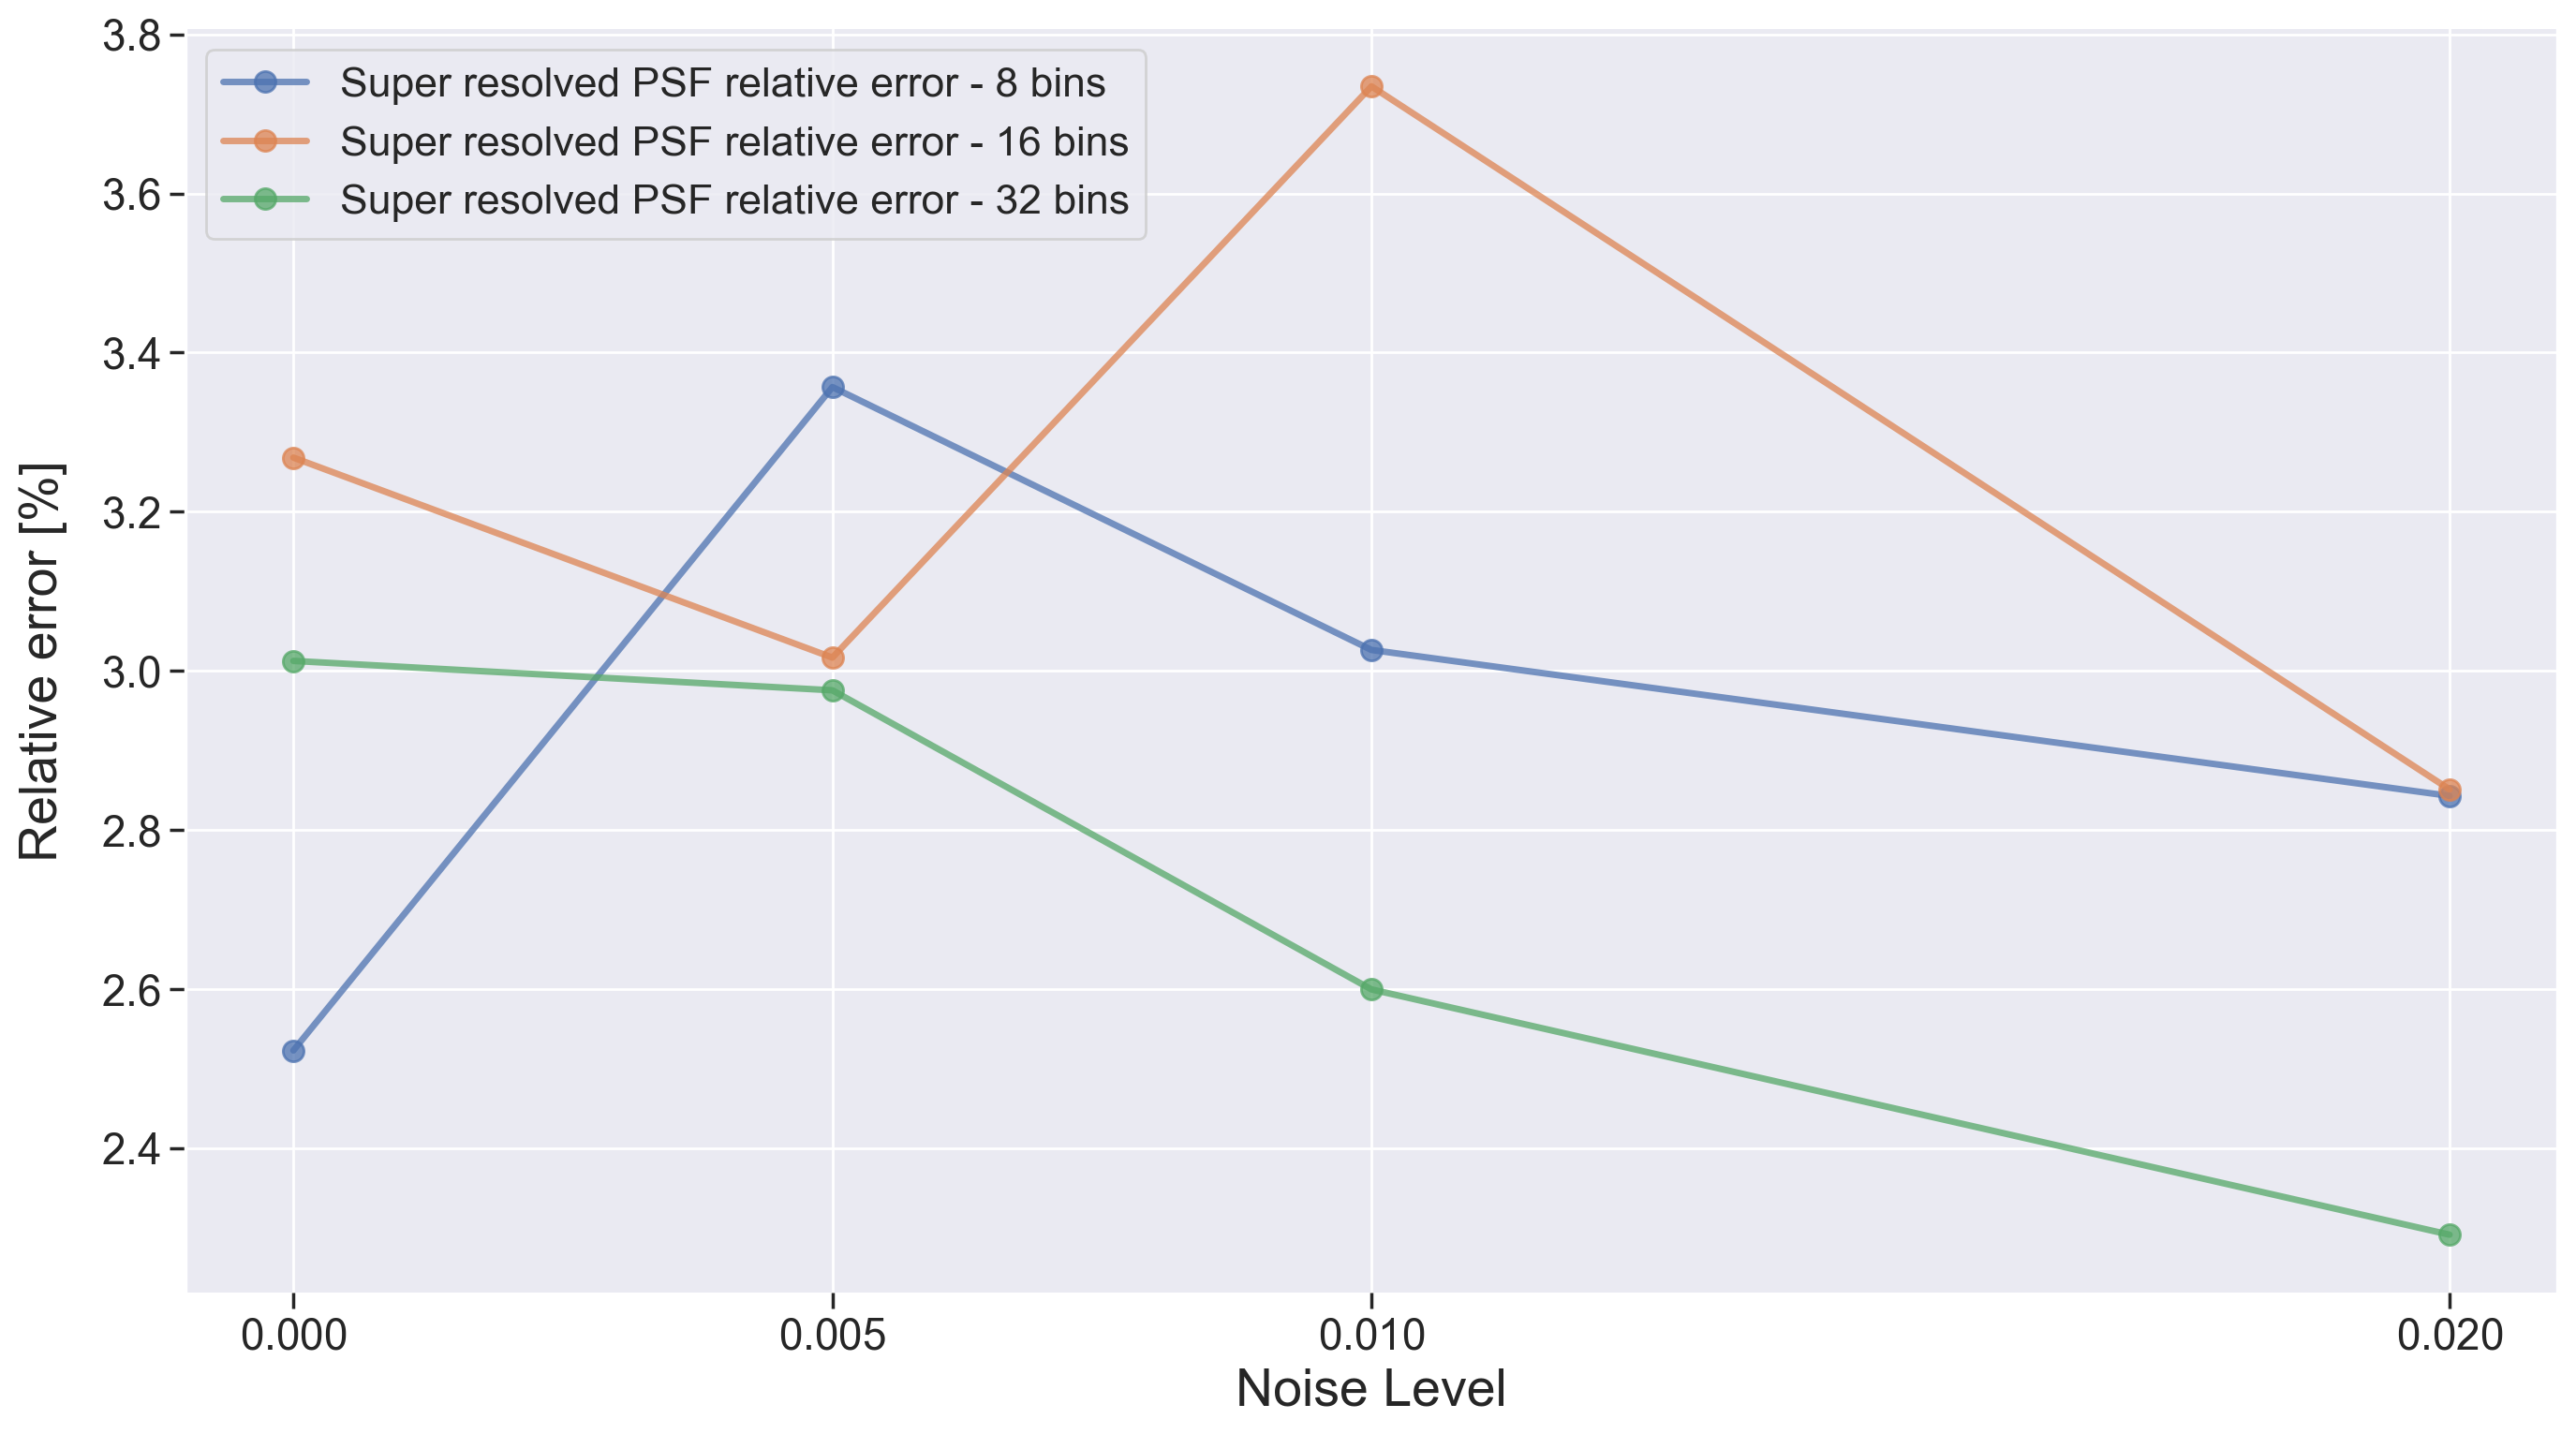

In [36]:
# Define style
define_plot_style()
sns.set(font_scale=1.5)

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot()

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

#ax1.plot(sigma_vals, polyc_rel_rmse, label='Euclid resolution PSF relative error', **kwargs)
ax1.plot(sigma_vals, pix_rel_rmse[0,:], label='Super resolved PSF relative error - 8 bins', **kwargs)
ax1.plot(sigma_vals, pix_rel_rmse[1,:], label='Super resolved PSF relative error - 16 bins', **kwargs)
ax1.plot(sigma_vals, pix_rel_rmse[2,:], label='Super resolved PSF relative error - 32 bins', **kwargs)

ax1.legend(prop={'size': 16})#, loc='upper right')

plt.xticks(sigma_vals)


ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()


# plt.minorticks_on()
ax1.yaxis.major.formatter._useMathText = True
ax1.xaxis.major.formatter._useMathText = True

ax1.set_ylabel('Relative error [%]', fontsize = 20)   
ax1.yaxis.set_label_coords(-0.05,0.5, transform=ax1.transAxes)
ax1.set_xlabel('Noise Level', fontsize = 20)

#plt.savefig(saving_folder + 'SR_PixRMSE_vs_NbStars.pdf')
plt.show()

# Euclid resolution pixel relative errors

In [38]:
metrics_ER_dict_list = np.array([[wf_psf.script_utils.extract_poly_results([np.load(metrics_file.format(realisation+1,n_bins_list[n_bins], sigma), allow_pickle=True)[()] for sigma in sigma_list]) for n_bins in range(len(n_bins_list))] for realisation in range(n_realizations)])
print(metrics_ER_dict_list.shape, '<---- (realisations, n_bins, metric_vals, sigmas)')
# 2 ---> relative RMSE (check output of: wf_psf.script_utils.extract_shape_pix_results())
pix_rel_rmse_ER = np.mean(metrics_ER_dict_list[:,:,2,:], axis=(0))
print(pix_rel_rmse_ER.shape, '<---- (n_bins, sigmas)')

(5, 3, 4, 4) <---- (realisations, n_bins, metric_vals, sigmas)
(3, 4) <---- (n_bins, sigmas)


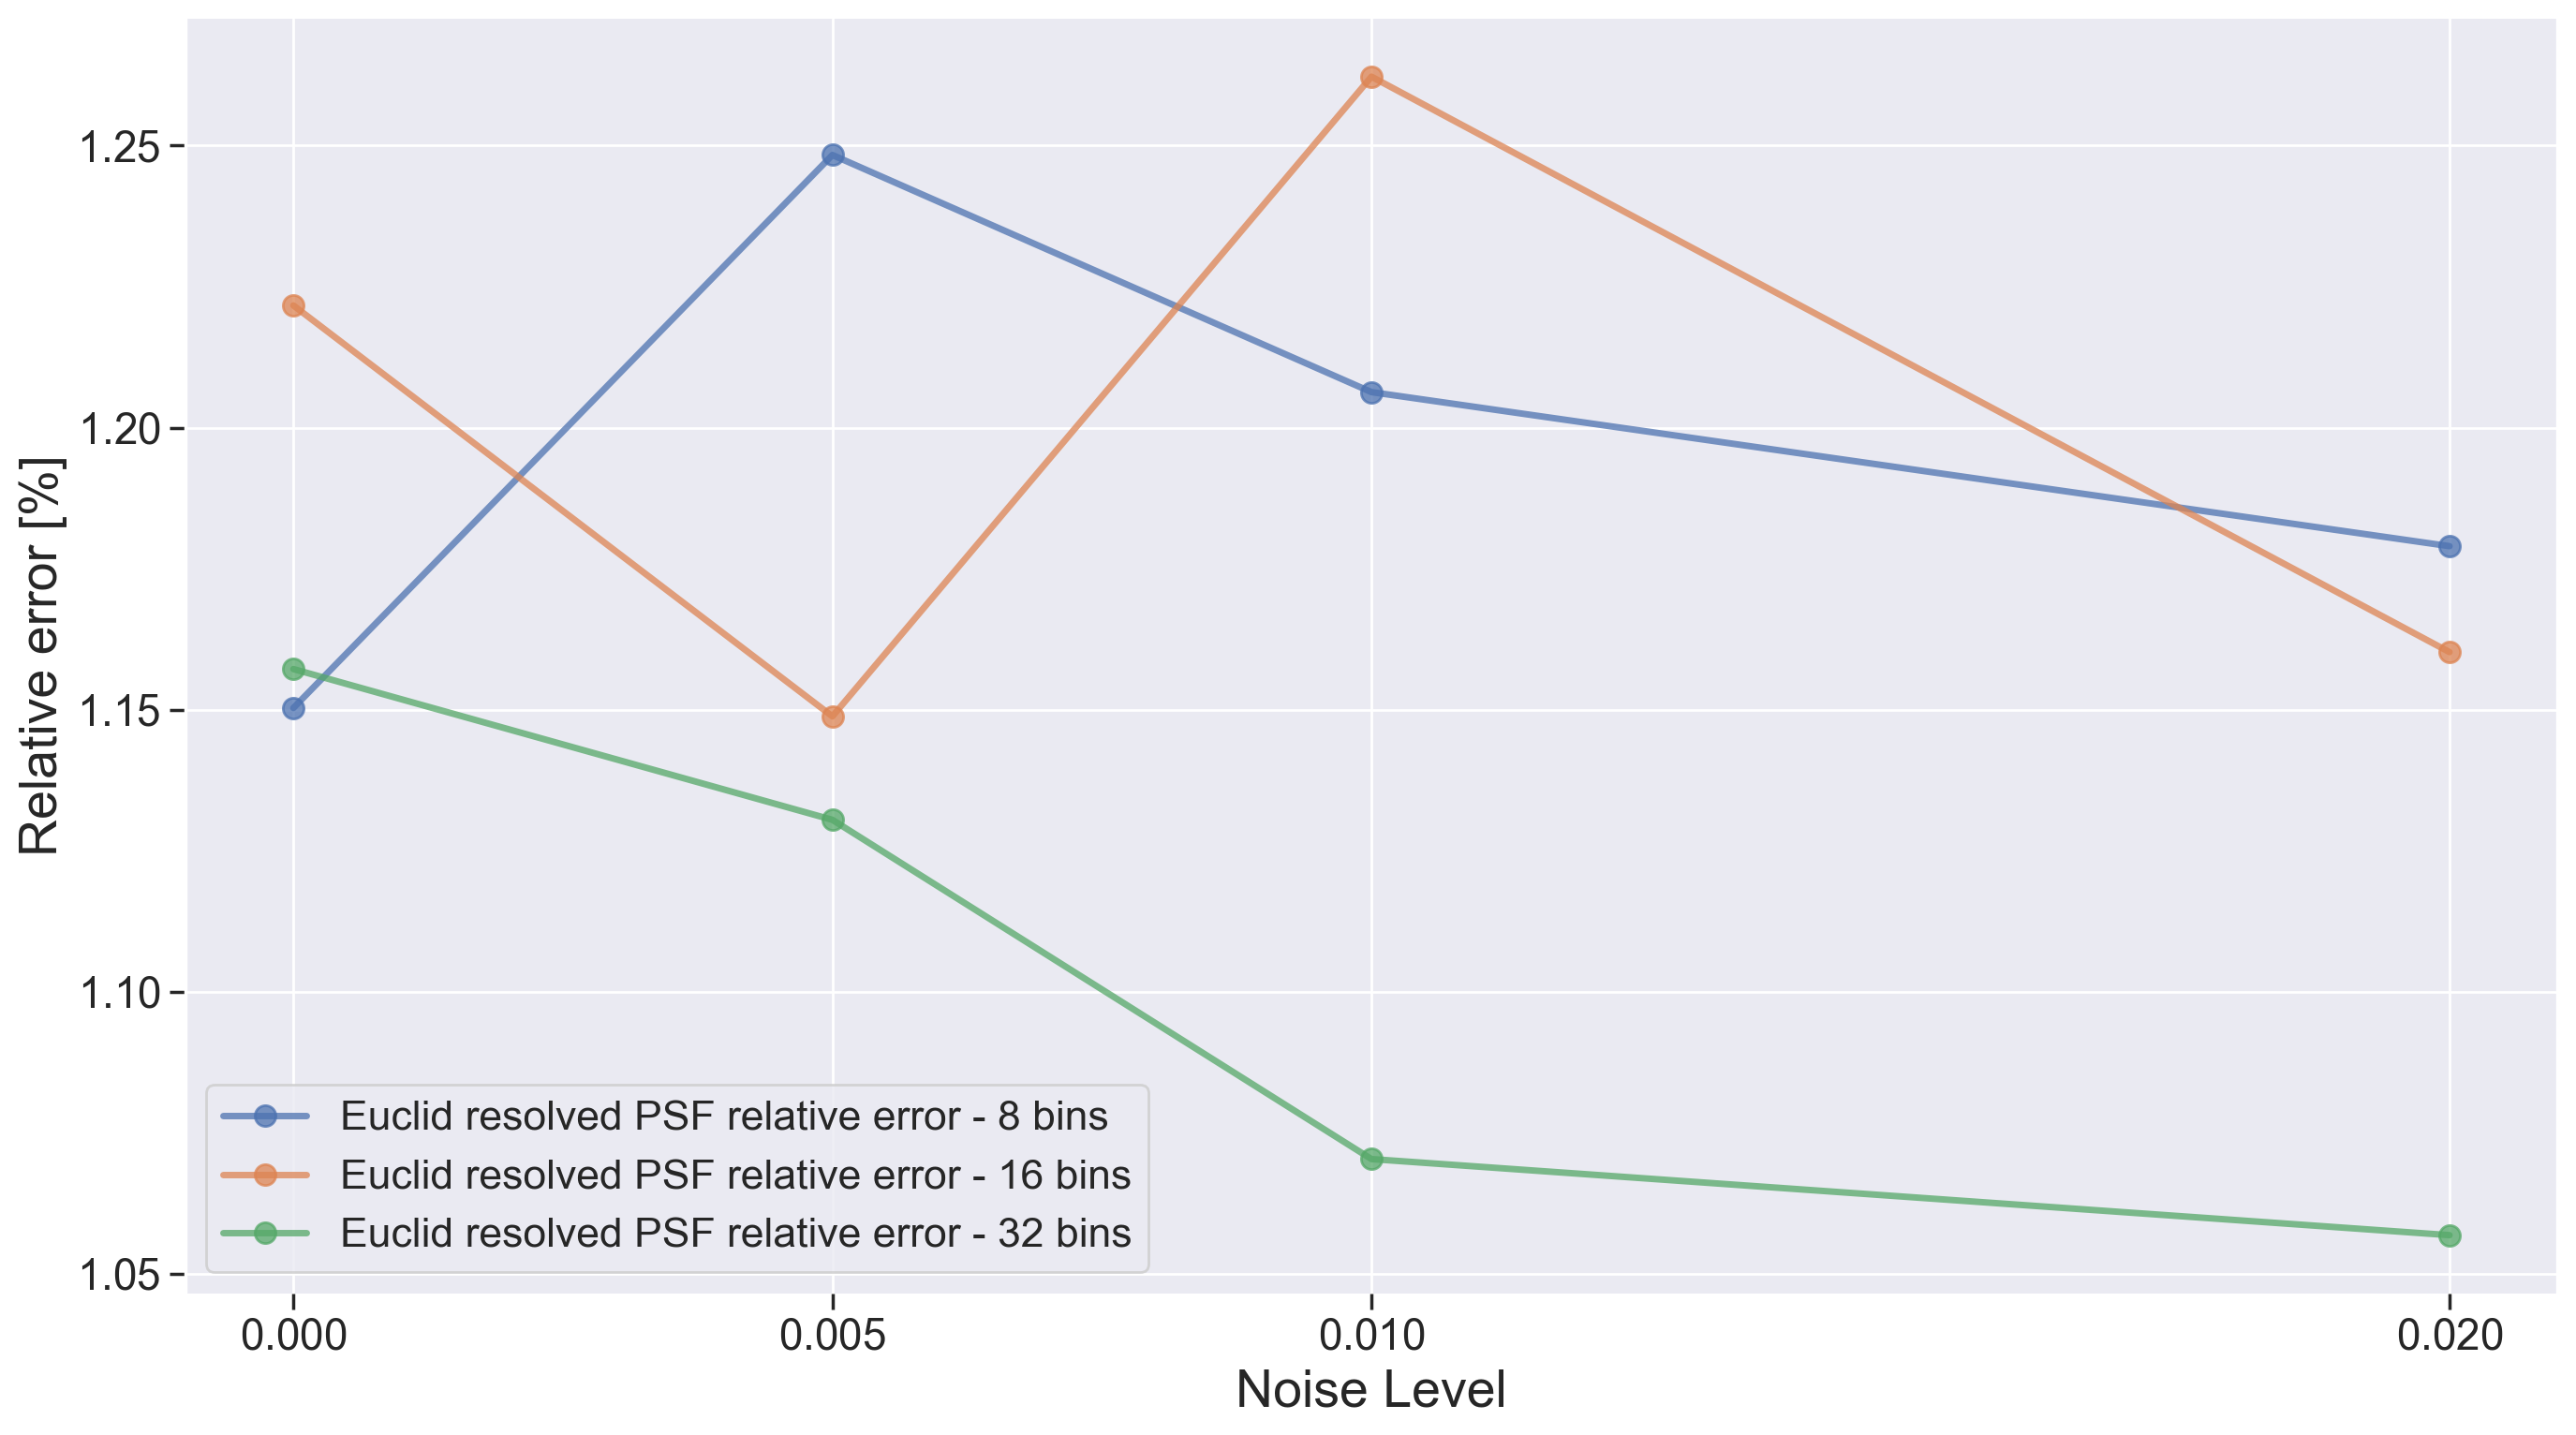

In [39]:
# Define style
define_plot_style()
sns.set(font_scale=1.5)

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot()

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

#ax1.plot(sigma_vals, polyc_rel_rmse, label='Euclid resolution PSF relative error', **kwargs)
ax1.plot(sigma_vals, pix_rel_rmse_ER[0,:], label='Euclid resolved PSF relative error - 8 bins', **kwargs)
ax1.plot(sigma_vals, pix_rel_rmse_ER[1,:], label='Euclid resolved PSF relative error - 16 bins', **kwargs)
ax1.plot(sigma_vals, pix_rel_rmse_ER[2,:], label='Euclid resolved PSF relative error - 32 bins', **kwargs)

ax1.legend(prop={'size': 16})#, loc='upper right')

plt.xticks(sigma_vals)


ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()


# plt.minorticks_on()
ax1.yaxis.major.formatter._useMathText = True
ax1.xaxis.major.formatter._useMathText = True

ax1.set_ylabel('Relative error [%]', fontsize = 20)   
ax1.yaxis.set_label_coords(-0.05,0.5, transform=ax1.transAxes)
ax1.set_xlabel('Noise Level', fontsize = 20)

#plt.savefig(saving_folder + 'SR_PixRMSE_vs_NbStars.pdf')
plt.show()

# OPD relative error

In [40]:
metrics_opd_dict_list = np.array([[wf_psf.script_utils.extract_opd_results([np.load(metrics_file.format(realisation+1,n_bins_list[n_bins], sigma), allow_pickle=True)[()] for sigma in sigma_list]) for n_bins in range(len(n_bins_list))] for realisation in range(n_realizations)])
print(metrics_opd_dict_list.shape, '<---- (realisations, n_bins, metric_vals, sigmas)')
# 2 ---> relative RMSE (check output of: wf_psf.script_utils.extract_shape_pix_results())
pix_rel_rmse_opd = np.mean(metrics_opd_dict_list[:,:,2,:], axis=(0))
print(pix_rel_rmse_opd.shape, '<---- (n_bins, sigmas)')

(5, 3, 4, 4) <---- (realisations, n_bins, metric_vals, sigmas)
(3, 4) <---- (n_bins, sigmas)


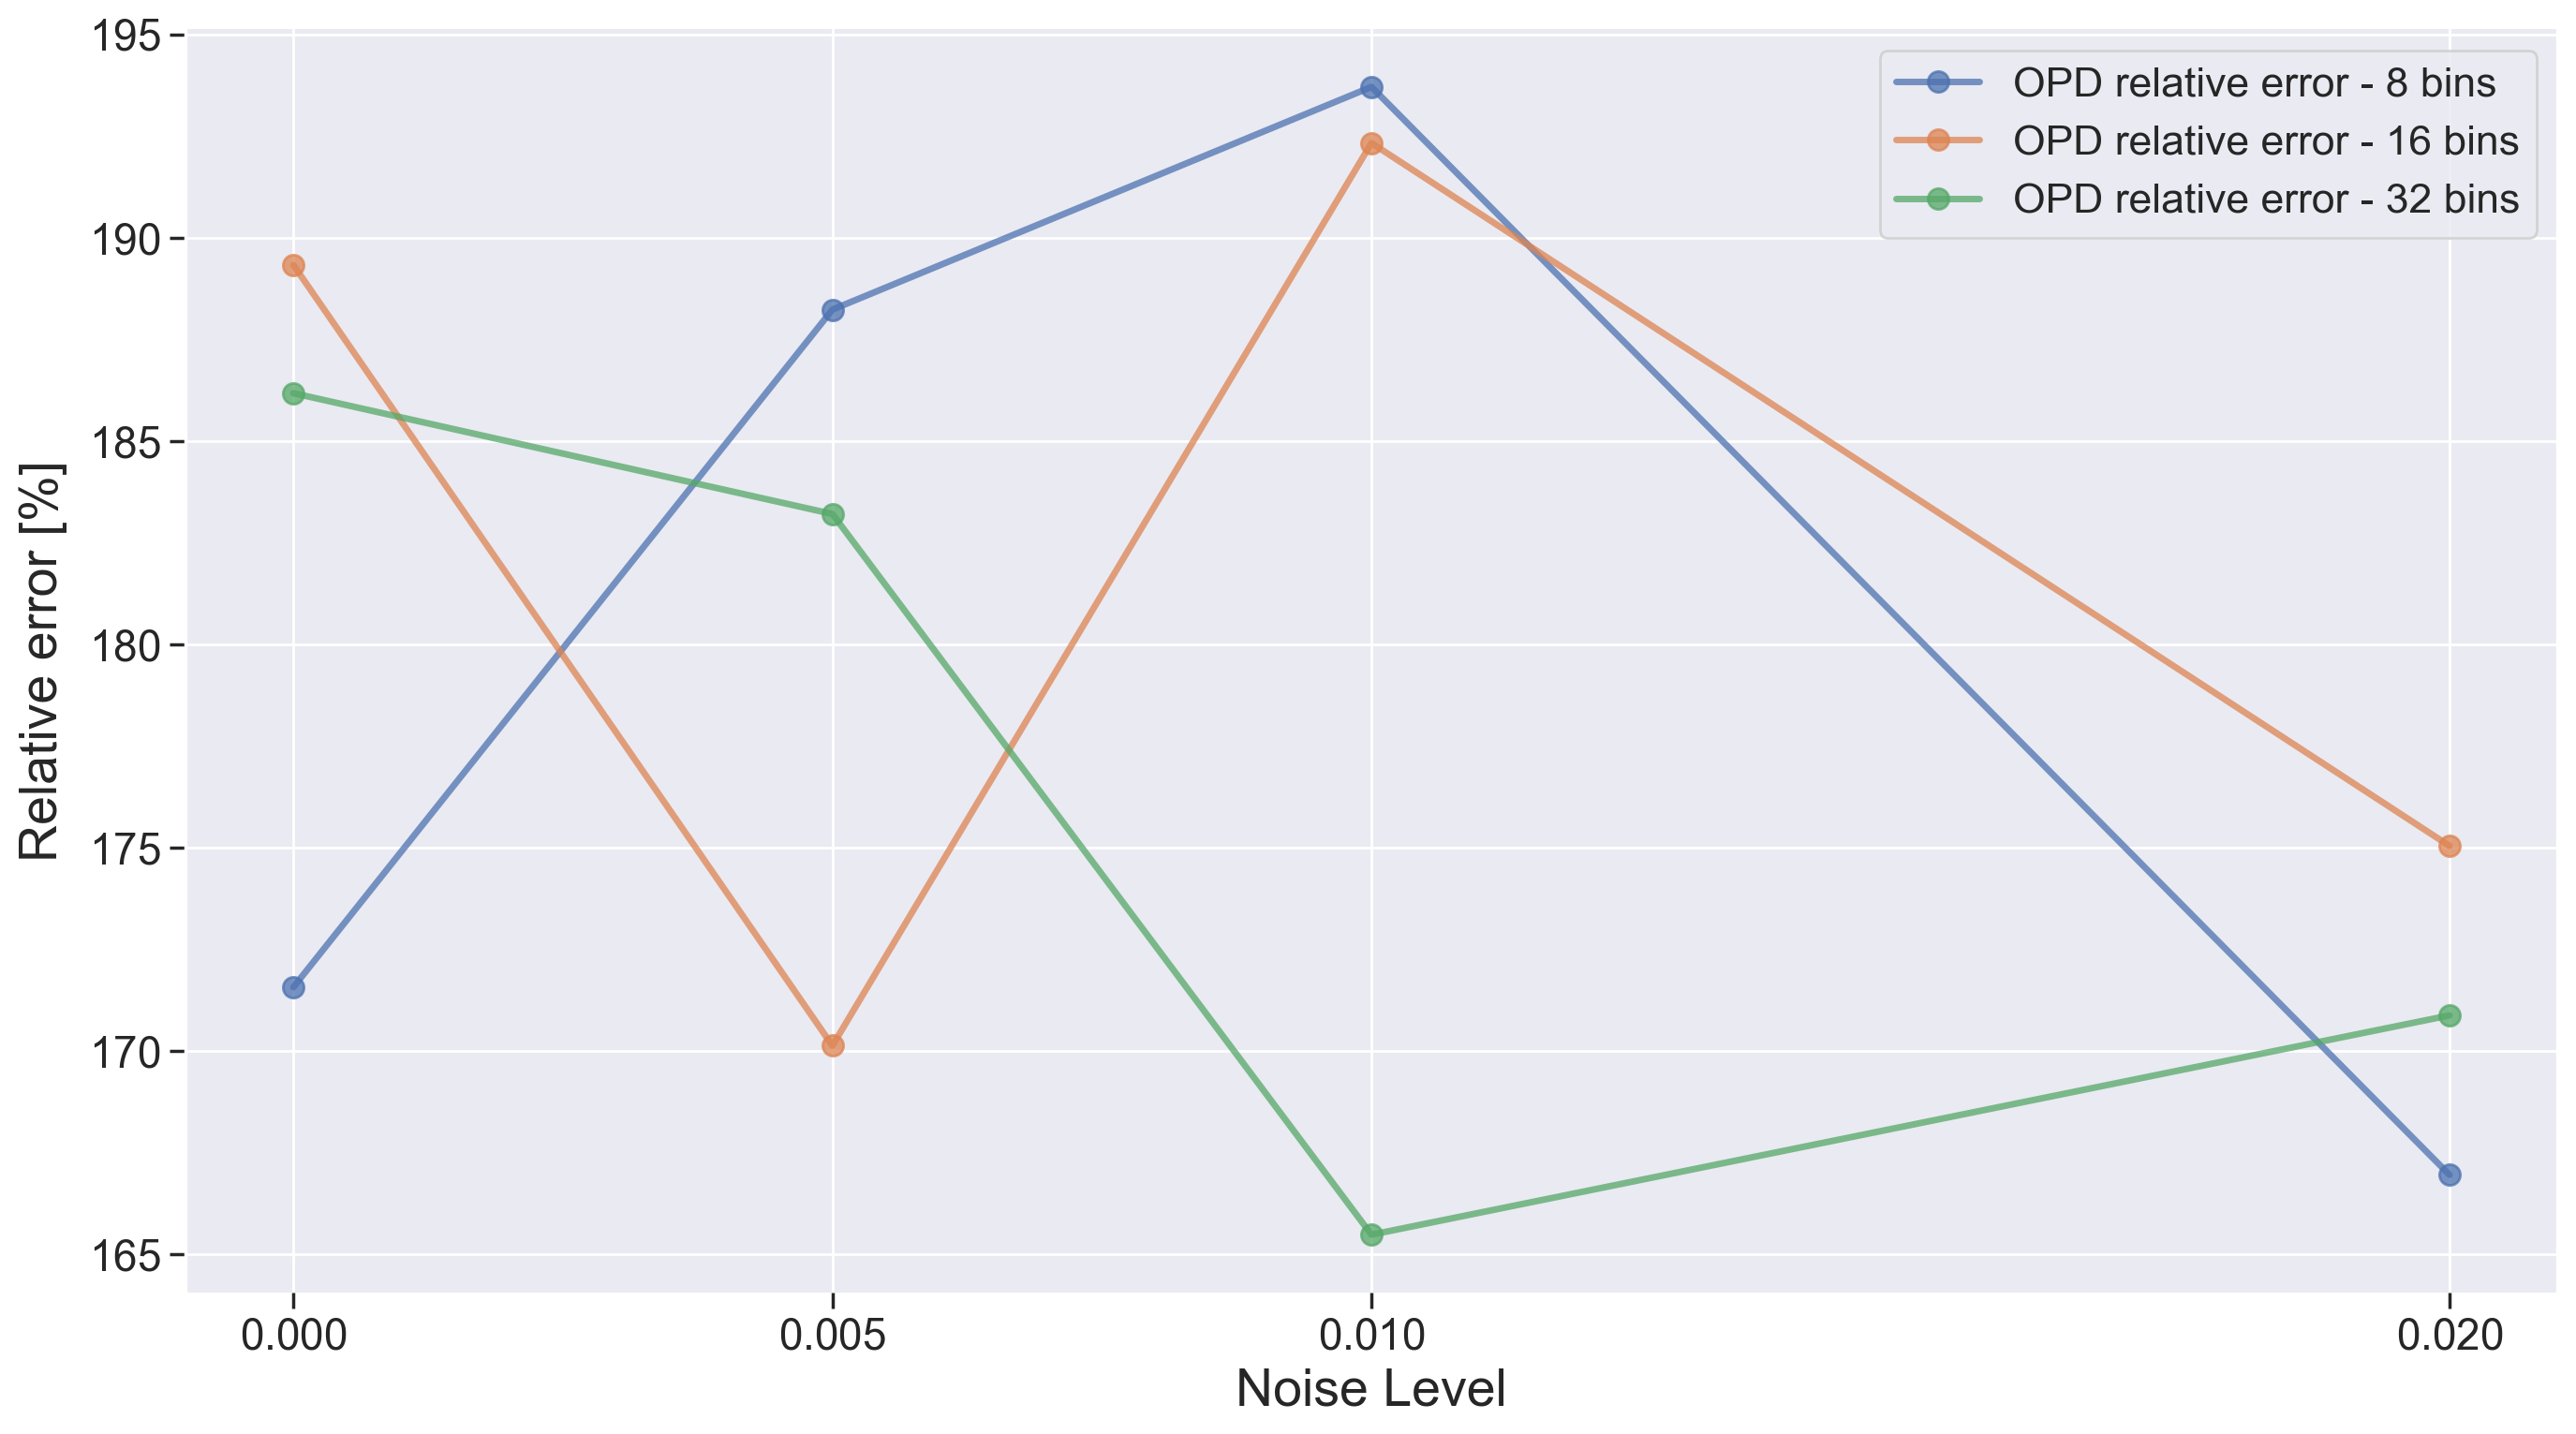

In [41]:
# Define style
define_plot_style()
sns.set(font_scale=1.5)

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot()

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

#ax1.plot(sigma_vals, polyc_rel_rmse, label='Euclid resolution PSF relative error', **kwargs)
ax1.plot(sigma_vals, pix_rel_rmse_opd[0,:], label='OPD relative error - 8 bins', **kwargs)
ax1.plot(sigma_vals, pix_rel_rmse_opd[1,:], label='OPD relative error - 16 bins', **kwargs)
ax1.plot(sigma_vals, pix_rel_rmse_opd[2,:], label='OPD relative error - 32 bins', **kwargs)

ax1.legend(prop={'size': 16})#, loc='upper right')

plt.xticks(sigma_vals)


ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()


# plt.minorticks_on()
ax1.yaxis.major.formatter._useMathText = True
ax1.xaxis.major.formatter._useMathText = True

ax1.set_ylabel('Relative error [%]', fontsize = 20)   
ax1.yaxis.set_label_coords(-0.05,0.5, transform=ax1.transAxes)
ax1.set_xlabel('Noise Level', fontsize = 20)

#plt.savefig(saving_folder + 'SR_PixRMSE_vs_NbStars.pdf')
plt.show()